# PTR Submit

In [1]:
import numpy as np
import pandas as pd

In [2]:
label2num = {'no_relation': 0, 'org:top_members/employees': 1, 'org:members': 2, 'org:product': 3, 'per:title': 4, 'org:alternate_names': 5, 'per:employee_of': 6, 'org:place_of_headquarters': 7, 'per:product': 8, 'org:number_of_employees/members': 9, 'per:children': 10, 'per:place_of_residence': 11, 'per:alternate_names': 12, 'per:other_family': 13, 'per:colleagues': 14, 'per:origin': 15, 'per:siblings': 16, 'per:spouse': 17, 'org:founded': 18, 'org:political/religious_affiliation': 19, 'org:member_of': 20, 'per:parents': 21, 'org:dissolved': 22, 'per:schools_attended': 23, 'per:date_of_death': 24, 'per:date_of_birth': 25, 'per:place_of_birth': 26, 'per:place_of_death': 27, 'org:founded_by': 28, 'per:religion': 29}
num2label = {v:k for k, v in label2num.items()}

In [3]:
def softmax(arr: np.ndarray, axis: int = -1):
    c = arr.max(axis=axis, keepdims=True)
    s = arr - c
    nominator = np.exp(s)
    denominator = nominator.sum(axis=axis, keepdims=True)
    probs = nominator / denominator
    return probs

In [4]:
scores = np.load('scores.npy')
all_labels = np.load('all_labels.npy')
output_prob = softmax(scores)

In [6]:
scores.shape

(7765, 30)

In [22]:
pred_answer = scores.argmax(-1)

In [11]:
test_dataset_dir = "/opt/ml/dataset/test/test_data.csv"

In [26]:
df_test = pd.read_csv(test_dataset_dir)
test_id = df_test['id'].values

In [23]:
import os
os.getcwd()

'/opt/ml/klue-level2-nlp-14'

In [87]:
## make csv file with predicted answer
#########################################################
# 아래 directory와 columns의 형태는 지켜주시기 바랍니다.
output = pd.DataFrame({'id':test_id,'pred_label':pred_answer,'probs':output_prob.tolist(),})
output.pred_label = output.pred_label.map(num2label)
output.to_csv('roberta-large_bs64_maxlen139_ws100_lr3e-05_lrt1e-05.csv', index=False) # 최종적으로 완성된 예측한 라벨 csv 파일 형태로 저장.
#### 필수!! ##############################################

---

# 비교

In [32]:
df_best = pd.read_csv('ensemble.csv')

In [35]:
df_best.pred_label = df_best.pred_label.map(label2num)

In [37]:
(df_best.pred_label == output.pred_label).sum() / len(df_best)

0.8739214423696072

In [38]:
import seaborn as sns

In [40]:
import matplotlib.pyplot as plt

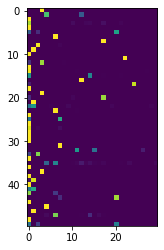

In [46]:
plt.imshow(output_prob[:50, :])

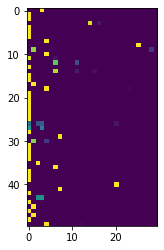

In [47]:
plt.imshow(output_prob[50:100, :])

In [63]:
df_best.probs = df_best.probs.apply(lambda x : eval(x))

In [69]:
df_best_probs = np.array([ np.array(i) for i in df_best.probs])

In [80]:
def show(s, e):
    plt.imshow((output_prob[s:e, :] / df_best_probs[s:e, :]))

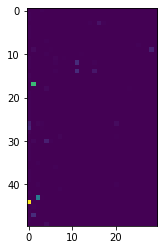

In [81]:
show(50, 100)

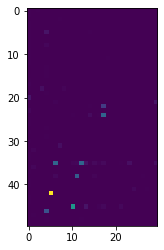

In [82]:
show(100, 150)

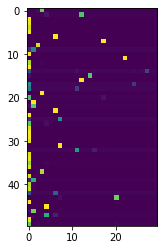

In [72]:
plt.imshow(df_best_probs[:50, :])